In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os, sys
import math

from image_annotations_3d import ImageAnnotations3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [106]:
targets = np.array([[1250.0, 1750.0, 100.0], [1750.0, 1750.0, 100.0]])
targets_obj = np.array([[
    [1200.0, 1700.0, 115.0], [1300.0, 1700.0, 115.0], [1270.0, 1725.0, 85.0], [1230.0, 1725.0, 85.0], [1200.0, 1700.0, 115.0],
    [1200.0, 1800.0, 115.0], [1230.0, 1775.0, 85.0], [1230.0, 1725.0, 85.0], [1200.0, 1700.0, 115.0], [1200.0, 1800.0, 115.0],
    [1300.0, 1800.0, 115.0], [1270.0, 1775.0, 85.0], [1230.0, 1775.0, 85.0], [1200.0, 1800.0, 115.0], [1300.0, 1800.0, 115.0],
    [1300.0, 1700.0, 115.0], [1270.0, 1725.0, 85.0], [1270.0, 1775.0, 85.0], [1300.0, 1800.0, 115.0], [1300.0, 1700.0, 115.0],
    [1270.0, 1725.0, 85.0], [1230.0, 1725.0, 85.0], [1230.0, 1775.0, 85.0], [1270.0, 1775.0, 85.0], [1270.0, 1725.0, 85.0]
],
[
    [1700.0, 1700.0, 115.0], [1800.0, 1700.0, 115.0], [1770.0, 1725.0, 85.0], [1730.0, 1725.0, 85.0], [1700.0, 1700.0, 115.0],
    [1700.0, 1800.0, 115.0], [1730.0, 1775.0, 85.0], [1730.0, 1725.0, 85.0], [1700.0, 1700.0, 115.0], [1700.0, 1800.0, 115.0],
    [1800.0, 1800.0, 115.0], [1770.0, 1775.0, 85.0], [1730.0, 1775.0, 85.0], [1700.0, 1800.0, 115.0], [1800.0, 1800.0, 115.0],
    [1800.0, 1700.0, 115.0], [1770.0, 1725.0, 85.0], [1770.0, 1775.0, 85.0], [1770.0, 1775.0, 85.0], [1800.0, 1800.0, 115.0],
    [1770.0, 1775.0, 85.0], [1730.0, 1775.0, 85.0], [1730.0, 1725.0, 85.0], [1770.0, 1725.0, 85.0], [1770.0, 1775.0, 85.0]
]])

table = np.array([
    [1900.0, 1650.0, 80.0], [1900.0, 1650.0, 74.0], [1100.0, 1650.0, 74.0], [1100.0, 1650.0, 80.0], [1900.0, 1650.0, 80.0], 
    [1900.0, 1850.0, 80.0], [1900.0, 1850.0, 74.0], [1900.0, 1650.0, 74.0], [1900.0, 1650.0, 80.0], [1900.0, 1850.0, 80.0],
    [1900.0, 1850.0, 74.0], [1100.0, 1850.0, 74.0], [1100.0, 1850.0, 80.0], [1900.0, 1850.0, 80.0], [1900.0, 1850.0, 74.0], 
    [1100.0, 1850.0, 74.0], [1100.0, 1650.0, 74.0], [1100.0, 1650.0, 80.0], [1100.0, 1850.0, 80.0], [1100.0, 1850.0, 74.0],
    [1100.0, 1650.0, 74.0], [1900.0, 1650.0, 74.0], [1900.0, 1850.0, 74.0], [1100.0, 1850.0, 74.0], [1100.0, 1650.0, 74.0]
])

t_shape = targets_obj.shape
table_shape = table.shape
verts_t1 = [[targets_obj[0, i, 0], targets_obj[0, i, 1], targets_obj[0, i, 2]] for i in range(t_shape[1])]
verts_t2 = [[targets_obj[1, i, 0], targets_obj[1, i, 1], targets_obj[1, i, 2]] for i in range(t_shape[1])]
verts_table = [[table[i, 0], table[i, 1], table[i, 2]] for i in range(table_shape[0])]

<IPython.core.display.Javascript object>


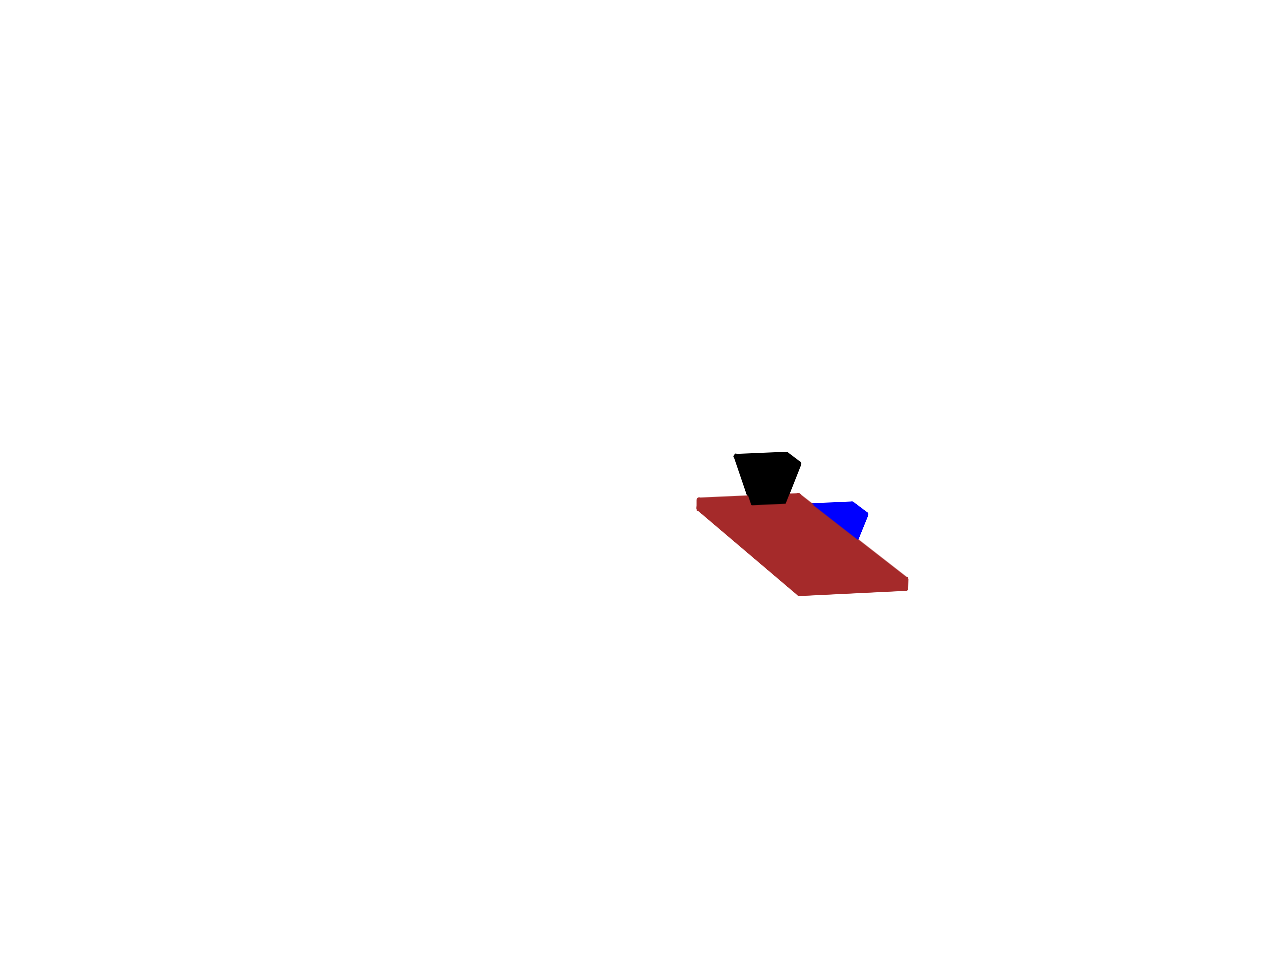

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)
ax.axis('off')
ax.plot(np.array([targets[0, 0]]), np.array([targets[0, 1]]), np.array([targets[0, 2]]),
        color='darkorange', marker='D', markersize=5)
ax.plot(np.array([targets[1, 0]]), np.array([targets[1, 1]]), np.array([targets[1, 2]]),
        color='darkorange', marker='D', markersize=5)
ax.plot(targets_obj[0, :, 0], targets_obj[0, :, 1], targets_obj[0, :, 2], color='black')
ax.plot(targets_obj[1, :, 0], targets_obj[1, :, 1], targets_obj[1, :, 2], color='blue')
ax.plot(table[:, 0], table[:, 1], table[:, 2], color='brown')
ax.add_collection3d(Poly3DCollection([verts_table[0:5]], color='brown', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_table[5:10]], color='brown', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_table[10:15]], color='brown', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_table[15:20]], color='brown', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_table[20:25]], color='brown', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t1[0:5]], color='black', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t1[5:10]], color='black', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t1[10:15]], color='black', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t1[15:20]], color='black', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t1[20:25]], color='black', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t2[0:5]], color='blue', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t2[5:10]], color='blue', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t2[10:15]], color='blue', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t2[15:20]], color='blue', zsort='max'))
ax.add_collection3d(Poly3DCollection([verts_t2[20:25]], color='blue', zsort='max'))
ax.set_xlim3d(1000, 2000)
ax.set_ylim3d(1000, 2000)
ax.set_zlim3d(0, 250)
fig.show()